[Kaggle Dataset](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

# EDA of Amazon's Top 50 Bestselling Books 2009 - 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('amazon-bestsellers.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


This dataset contains 3 categorical columns (Name, Author, and Genre) and 4 numerical columns (User Rating, Reviews, Price, Year).

## Check for missing data

In [3]:
df.shape # Seems like there are no books omitted

(550, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Looking at the non-null counts for all columns, it's clear that there are no missing values in the dataset.

The "Genre" column seems to only contain 2 values. It would make sense to convert it from an "object" dtype to a "category" dtype.

In [5]:
df['Genre'] = df['Genre'].astype('category')

## Cleaning Data

### Name

In [6]:
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

In [7]:
for col in categorical_columns:
    print(f'Number of values before title() in {col}: {len(set(df[col]))}', f'Number of values after title() in {col}: {len(set(df[col].str.title()))}')

Number of values before title() in Name: 351 Number of values after title() in Name: 350
Number of values before title() in Author: 248 Number of values after title() in Author: 248
Number of values before title() in Genre: 2 Number of values after title() in Genre: 2


The "Name" column seems to contain 1 value that has a capitalization difference. The following cell fixes it.

In [8]:
df['Name'] = df['Name'].str.title()

In [9]:
for col in categorical_columns:
    print(f'Number of values before title() in {col}: {len(set(df[col]))}', f'Number of values after title() in {col}: {len(set(df[col].str.title()))}')

Number of values before title() in Name: 350 Number of values after title() in Name: 350
Number of values before title() in Author: 248 Number of values after title() in Author: 248
Number of values before title() in Genre: 2 Number of values after title() in Genre: 2


Some titles may appear weirdly since ```title()``` causes letters after punctuation to be capitalized but for the purpose of data analysis, this should be acceptable

In [10]:
for col in categorical_columns:
    print(f'Number of values before strip() in {col}: {len(set(df[col]))}', f'Number of values after strip() in {col}: {len(set(df[col].str.strip()))}')

Number of values before strip() in Name: 350 Number of values after strip() in Name: 350
Number of values before strip() in Author: 248 Number of values after strip() in Author: 248
Number of values before strip() in Genre: 2 Number of values after strip() in Genre: 2


There seem to be no titles containing excessive whitespace.

### Author

In [11]:
len(df['Author'].unique())

248

In [12]:
df['Author'].sort_values().unique()

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

There are 2 authors in this dataset that appear multiple times under different spellings: George R. R. Martin and J. K. Rowling. Let's change the applicable rows so that they display the same spelling for the respective authors.

In [13]:
df = df.replace('George R.R. Martin', 'George R. R. Martin')
df = df.replace('J.K. Rowling', 'J. K. Rowling')
len(df['Author'].unique())

246

### Year

In [14]:
df['Year'].value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

The "Year" column does not require any changes.

### Genre

In [15]:
df['Genre'].unique()

['Non Fiction', 'Fiction']
Categories (2, object): ['Non Fiction', 'Fiction']

The "Genre" column does not require any more changes after changing its dtype.

## Initial Insights

This section will look into a couple of questions that we may be curious about:
1. Which books have appeared most often on Amazon's yearly bestseller list?
2. Which authors have had the most works appear on Amazon's yearly bestseller list?

### Which books have appeared most often on Amazon's yearly bestseller list?

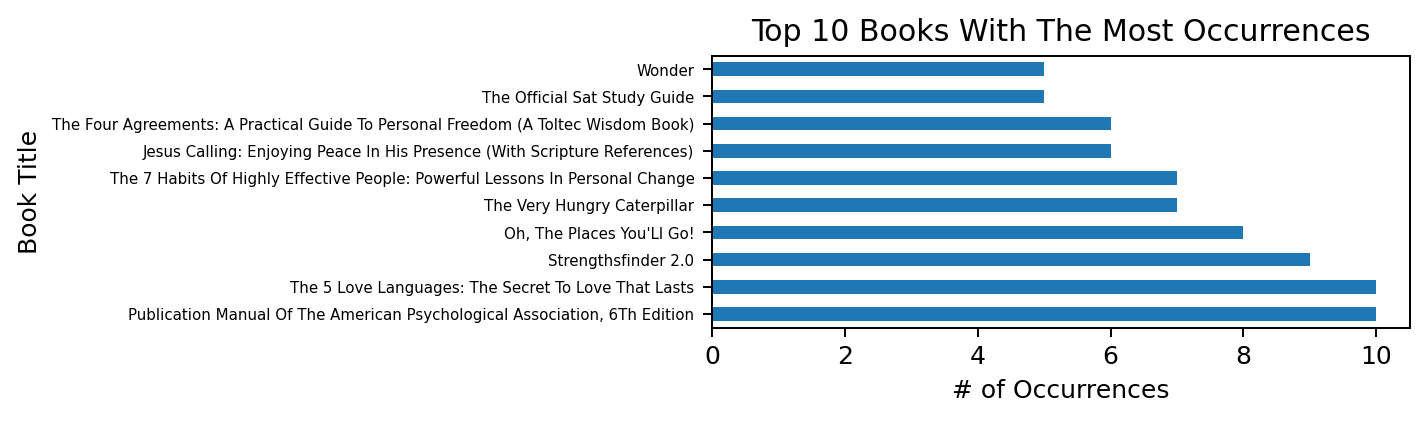

In [16]:
plt.figure(figsize=(5,2), dpi=180)

df['Name'].value_counts().head(10).plot(kind='barh')

plt.title('Top 10 Books With The Most Occurrences')
plt.xlabel('# of Occurrences')
plt.ylabel('Book Title')
plt.yticks(fontsize=6)

plt.show()

There were 2 titles that were on Amazon's bestseller list almost every year from 2009-2019. These were *The 5 Love Languages: The Secret To Love That Lasts* and *Publication Manual Of The American Psychological Association, 6th Edition*. Only 8 titles had more than 5 occurrences on the bestseller list.

However, *The 5 Love Languages: The Secret To Love That Lasts* seems to have been renamed between 2009 and 2010 so technically, the book itself has been on the bestselling list every year.

In [17]:
df[df['Name'].str.contains('Love Languages')].sort_values('Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
374,The Five Love Languages: How To Express Heartf...,Gary Chapman,4.6,803,9,2009,Non Fiction
320,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.7,3477,28,2010,Non Fiction
321,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.7,3477,28,2011,Non Fiction
322,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.7,3477,28,2012,Non Fiction
323,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.7,3477,28,2013,Non Fiction
324,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.7,3477,28,2014,Non Fiction
325,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.8,25554,8,2015,Non Fiction
326,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.8,25554,8,2016,Non Fiction
327,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.8,25554,8,2017,Non Fiction
328,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.8,25554,8,2018,Non Fiction


### Which authors have had the most works appear on Amazon's yearly bestseller list?

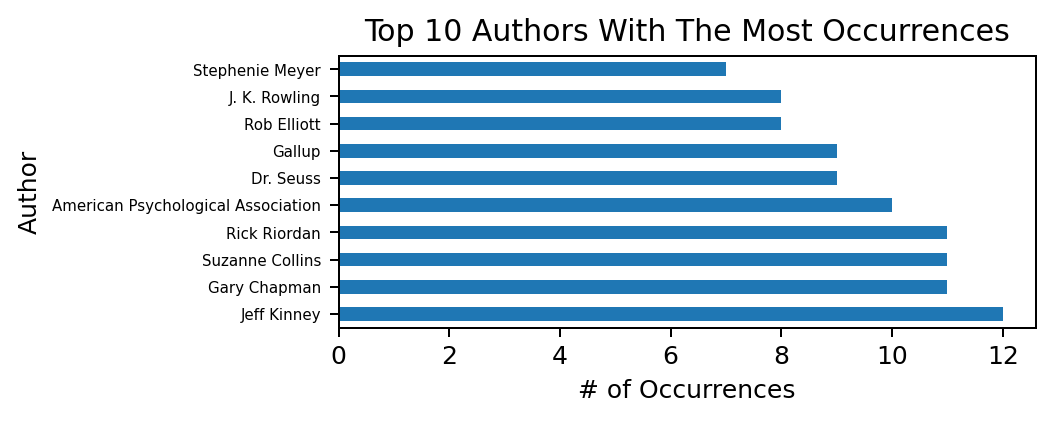

In [18]:
plt.figure(figsize=(5,2), dpi=180)

df['Author'].value_counts().head(10).plot(kind='barh')

plt.title('Top 10 Authors With The Most Occurrences')
plt.xlabel('# of Occurrences')
plt.ylabel('Author')
plt.yticks(fontsize=6)

plt.show()

Jeff Kinney has the most titles that have appeared on the bestseller list. With more than 11 occurrences, he must have had multiple titles on the bestseller list for at least 1 year between 2009 and 2019.

## Removing Duplicates

As we previously saw, there are multiple titles that have appeared on Amazon's bestseller list multiple times. Let's remove rows containing duplicate titles.

In [19]:
del df['Year']

In [20]:
df = df.drop_duplicates(subset='Name', keep='last')
df

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,Non Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


Let's confirm if all duplicate titles have been removed.

In [21]:
df['Name'].value_counts()

Three Cups Of Tea: One Man'S Mission To Promote Peace - One School At A Time                                   1
The Alchemist                                                                                                  1
Killing Patton: The Strange Death Of World War Ii'S Most Audacious General (Bill O'Reilly'S Killing Series)    1
Hillbilly Elegy: A Memoir Of A Family And Culture In Crisis                                                    1
Happy, Happy, Happy: My Life And Legacy As The Duck Commander                                                  1
                                                                                                              ..
A Dance With Dragons (A Song Of Ice And Fire)                                                                  1
Under The Dome: A Novel                                                                                        1
True Compass: A Memoir                                                                          

It looks like all duplicate titles have been removed.

## Correlations

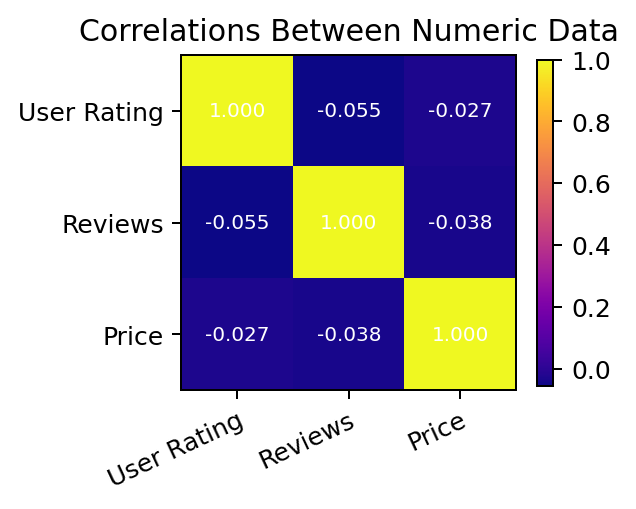

In [22]:
numerical_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(3,3), dpi=180)

heatmap = plt.imshow(numerical_df.corr(), cmap=plt.get_cmap('plasma'))

plt.title('Correlations Between Numeric Data')

plt.xticks(ticks=np.arange(len(numerical_df.columns)), labels=numerical_df.columns, rotation=25, ha='right', rotation_mode='anchor')
plt.yticks(ticks=np.arange(len(numerical_df.columns)), labels=numerical_df.columns)

for i in range(len(numerical_df.columns)):
    for j in range(len(numerical_df.columns)):
        plt.text(i, j, '%.3f' % numerical_df.corr().iloc[i, j], size=8, color='white', va='center', ha='center')

plt.colorbar(heatmap, shrink=0.80)
        
plt.show()

From a quick glance, there does not seem to be any strong correlations between any of the numeric data. Let's take a closer look with some scatter plots:

## Summary statistics of numerical data

In [23]:
df.describe()

,User Rating,Reviews,Price
count,350.000000,350.000000,350.000000
mean,4.608857,9804.605714,12.951429
std,0.226993,10885.017686,9.999452
min,3.300000,37.000000,0.000000
25%,4.500000,3435.250000,8.000000
50%,4.600000,6328.000000,11.000000
75%,4.800000,11510.250000,16.000000
max,4.900000,87841.000000,105.000000


There is nothing strange about these statistics. It's reasonable that the number of reviews would vary so much since it's highly dependent on popularity.

The following plots are box-and-whisker plots to provide a visualization of these summary statistics.

### User Rating

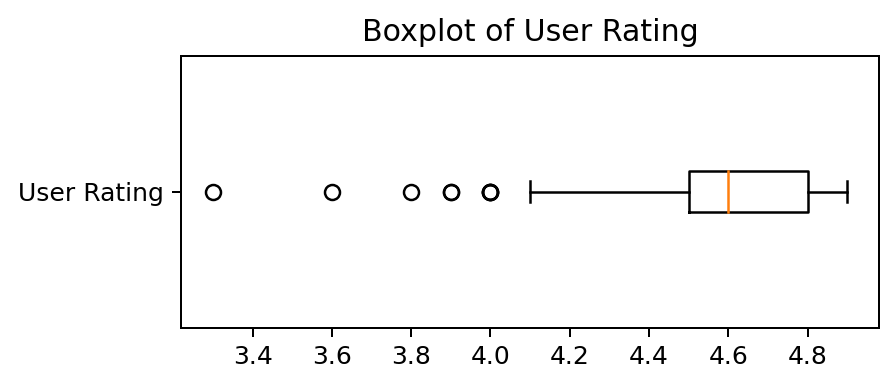

In [24]:
plt.figure(figsize=(5,2), dpi=180)

plt.boxplot(df['User Rating'], vert=False)

plt.title('Boxplot of User Rating')
plt.yticks([1], labels=['User Rating'])

plt.show()

### Reviews

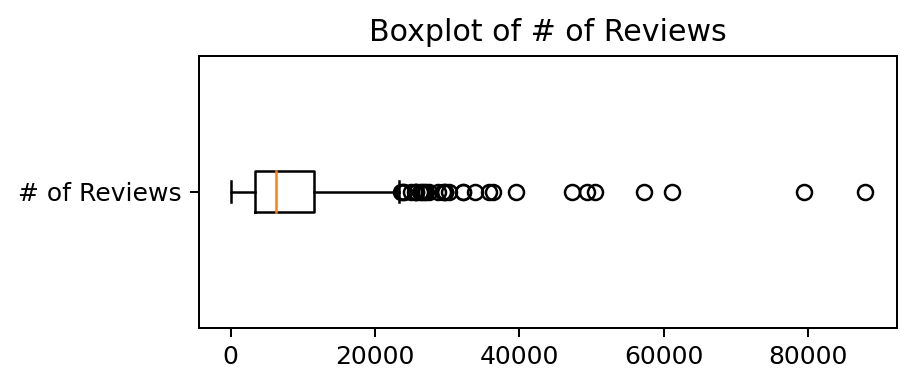

In [25]:
plt.figure(figsize=(5,2), dpi=180)

plt.boxplot(df['Reviews'], vert=False)
plt.title('Boxplot of # of Reviews')
plt.yticks([1], labels=['# of Reviews'])

plt.show()

### Price

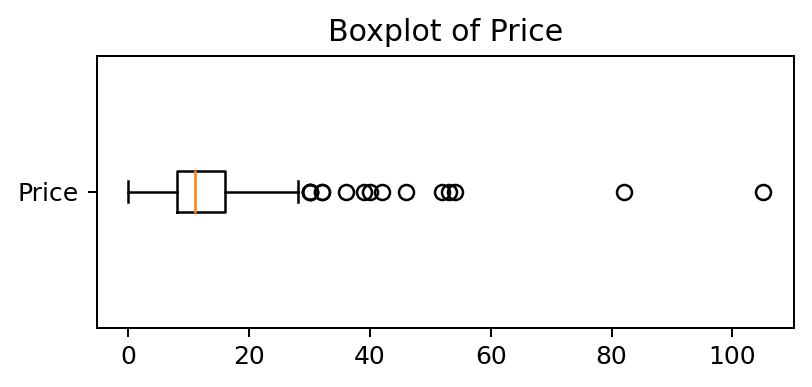

In [26]:
plt.figure(figsize=(5,2), dpi=180)

plt.boxplot(df['Price'], vert=False)
plt.title('Boxplot of Price')
plt.yticks([1], labels=['Price'])

plt.show()

## Examining User Ratings

In [27]:
user_rating_counts = df['User Rating'].value_counts().sort_index()
user_rating_counts

3.3     1
3.6     1
3.8     1
3.9     2
4.0     4
4.1     5
4.2     8
4.3    21
4.4    26
4.5    39
4.6    68
4.7    65
4.8    81
4.9    28
Name: User Rating, dtype: int64

The majority of average user ratings for Amazon's bestselling books seem to within the range of 4.6-4.8 stars. The following is a visualization for these numbers:

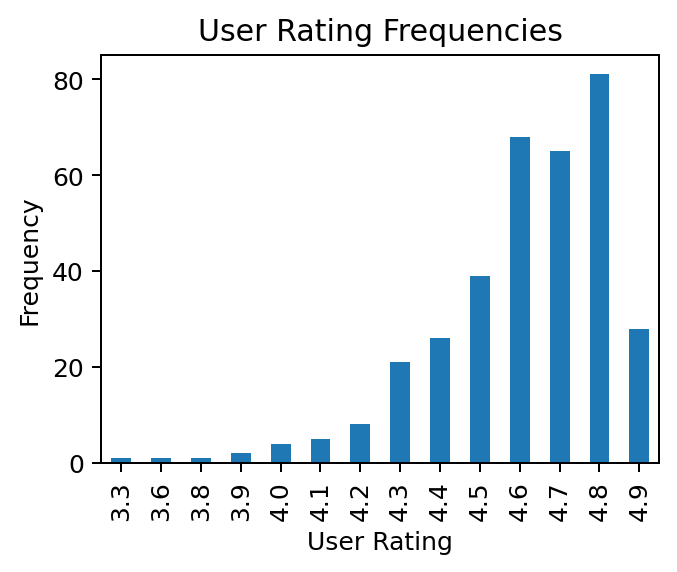

In [28]:
plt.figure(figsize=(4,3), dpi=180)

user_rating_counts.plot.bar()

plt.title('User Rating Frequencies')

plt.xlabel('User Rating')
plt.ylabel('Frequency')

plt.show()